# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
# difference in stock price
df["Diff"] = df["Adj Close"].diff().shift(-1)

# Target up or down
df["Target"] = np.sign(df["Diff"])

#option premium 
df["Premium"] = 0.08 * df["Adj Close"]

df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097592,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [5]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [8]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

In [9]:
logreg = LogisticRegression()
logreg.fit(X,y)
y_pred = logreg.predict(X)

/Users/carolyn/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:753: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/carolyn/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:591: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/carolyn/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:600: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/carolyn/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:753: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isi

# 4.) Add columns, prediction and profits.

In [12]:
df["Predictions"] = y_pred
df["Profits"] = 0.

# true positives
df.loc[(df["Predictions"] == 1) & (df["Target"] ==1), "Profits"] = df["Premium"]

# false positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == -1), "Profits"] = 100 * df["Diff"] + df["Premium"]

# true negatives
# = 0

# false negatives
# = 0

# 5.) Plot profits over time

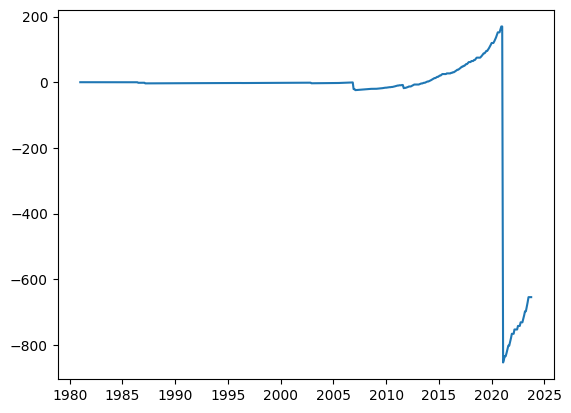

In [13]:
plt.plot(np.cumsum(df["Profits"]))
plt.show()

# 5.5.) Short write up about how you see your skills valuable to PJ and/or Philip Liu.

I think my skills with data analysis and my knowledge of the crypto market would both be valuable to Philip Liu and his startup ventures. I like researching the cryptocurrency market, and I think that my knowledge of his target demographic and cryptocurrency users in general would allow me to help with marketing, attracting more community engagement, and launching growth initiatives to try and get more creators on his platform. I also think that I'd be able to apply my data analysis skills to the data his company collects on people's training activity, so that I can help inform them and make better design decisions and feature decisions.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.